In [4]:
import os

In [5]:
data_dir = '/Users/sumanthpagadala/Desktop/code/DeepLearning/DATA/cell_images'

In [6]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
from matplotlib.image import imread

In [9]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'

In [10]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path+'/parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

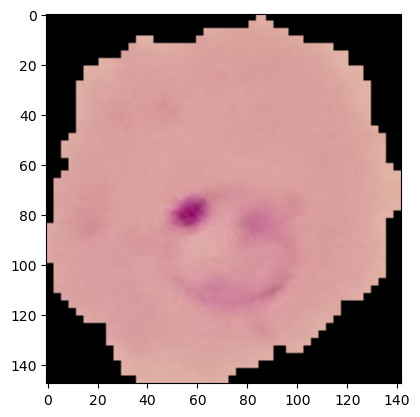

In [15]:
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'
plt.imshow(imread(para_cell))

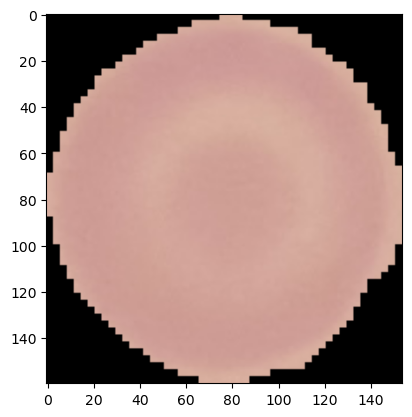

In [21]:
uninfected_cell_path = train_path+'/uninfected/'+os.listdir(train_path+'/uninfected')[3]
plt.imshow(imread(uninfected_cell_path))

In [23]:
len(os.listdir(train_path+'/parasitized'))

12480

In [24]:
len(os.listdir(train_path+'/uninfected'))

12480

In [25]:
len(os.listdir(test_path+'/parasitized'))

1300

In [26]:
len(os.listdir(test_path+'/uninfected'))

1300

In [28]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
    
    img = imread(test_path+'/uninfected/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [34]:
np.mean(dim1), np.mean(dim2)

(130.92538461538462, 130.75)

In [35]:
image_shape = (130, 130, 3)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more infor

In [38]:
image_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

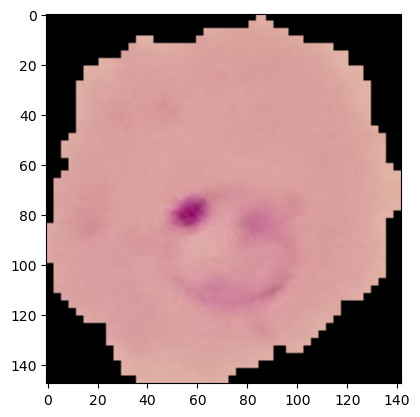

In [39]:
plt.imshow(imread(para_cell))

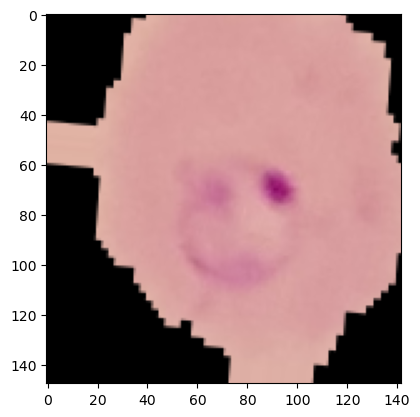

In [40]:
plt.imshow(image_gen.random_transform(imread(para_cell)))

In [41]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [42]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [45]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)       

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

batch_size = 16

train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary')


Found 24958 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [50]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [51]:
results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20


/var/folders/7v/9x6ygmhs4n7dwfpt5qfj0_6m0000gn/T/ipykernel_3592/3669551767.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])


1560/1560 [==============================] - 86s 55ms/step - loss: 0.3593 - accuracy: 0.8553 - val_loss: 0.2292 - val_accuracy: 0.9200
Epoch 2/20
1560/1560 [==============================] - 89s 57ms/step - loss: 0.2059 - accuracy: 0.9367 - val_loss: 0.1865 - val_accuracy: 0.9423
Epoch 3/20
1560/1560 [==============================] - 84s 54ms/step - loss: 0.1862 - accuracy: 0.9431 - val_loss: 0.1859 - val_accuracy: 0.9427
Epoch 4/20
1560/1560 [==============================] - 86s 55ms/step - loss: 0.1773 - accuracy: 0.9437 - val_loss: 0.1949 - val_accuracy: 0.9373
Epoch 5/20
1560/1560 [==============================] - 82s 52ms/step - loss: 0.1762 - accuracy: 0.9440 - val_loss: 0.1744 - val_accuracy: 0.9427
Epoch 6/20
1560/1560 [==============================] - 85s 55ms/step - loss: 0.1738 - accuracy: 0.9441 - val_loss: 0.1649 - val_accuracy: 0.9431
Epoch 7/20
1560/1560 [==============================] - 87s 55ms/step - loss: 0.1709 - accuracy: 0.9452 - val_loss: 0.1713 - val_accura

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save('malaria_detector.h5')

/Users/sumanthpagadala/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
losses = pd.DataFrame(model.history.history)

<Axes: >

<Figure size 1000x600 with 0 Axes>

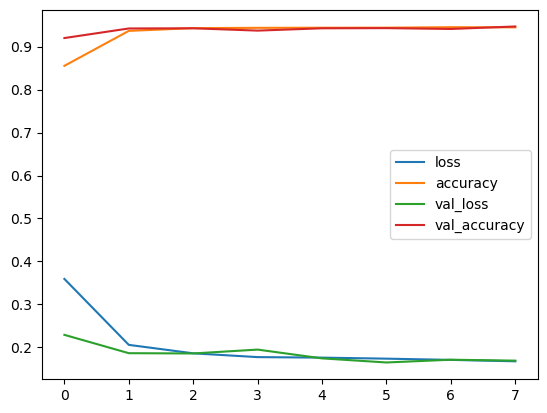

In [55]:
plt.figure(figsize=(10,6))
losses.plot()

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
pred = model.predict(test_image_gen)

163/163 [==============================] - 6s 39ms/step


In [69]:
predictions = pred > 0.5

print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1300
           1       0.92      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [70]:
confusion_matrix(test_image_gen.classes, predictions)


array([[1197,  103],
       [  53, 1247]])

In [71]:
para_cell

'/Users/sumanthpagadala/Desktop/code/DeepLearning/DATA/cell_images/train//parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [73]:
from tensorflow.keras.preprocessing import image

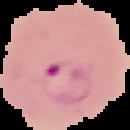

In [75]:
image.load_img(para_cell, target_size=image_shape)

In [76]:
my_image = image.load_img(para_cell, target_size=image_shape)

In [78]:
my_img_arr = image.img_to_array(my_image)

In [79]:
my_img_arr.shape

(130, 130, 3)

In [90]:
my_img_arr = np.expand_dims(my_image, axis=0)

In [91]:
my_img_arr.shape

(1, 130, 130, 3)

In [92]:
model.predict(my_img_arr)

1/1 [==============================] - 0s 46ms/step


array([[0.]], dtype=float32)

In [93]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}